# Intro to TensorFlow: Classify images of clothing

In [1]:
# import Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Activation, BatchNormalization
from tensorflow.keras.models import Sequential


# import the other helper libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [2]:
#complete the code below:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
print(fashion_mnist)


((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [3]:
#load the data into train_images, train_labels, test_images, test_labels
(train_images, train_labels), (test_images, test_labels) = fashion_mnist

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [4]:
#store the class names in a list
#complete the code below
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle Boot"
]

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [5]:
#check the dimensions of the training data
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [6]:
#verify the number of train_lables
train_labels.shape


(60000,)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [7]:
#verify the number of images in test_images by checking the dimensions
test_images.shape


(10000, 28, 28)

And the test set contains 10,000 images labels:

In [8]:
#verify the number of images in test_labels
test_labels.shape


(10000,)

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

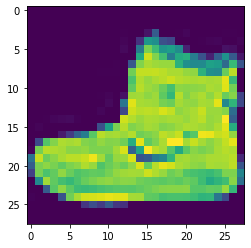

In [9]:
#plot a figure using the imshow() function to view the first image in train_images (train_images[0])
plt.imshow(train_images[0])


Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [10]:
#complete the code below
train_images = train_images/255

test_images = test_images/255

To verify that the data is in the correct format and that you're ready to build and train the network, display the first 25 images from the *training set* and display the class name below each image.

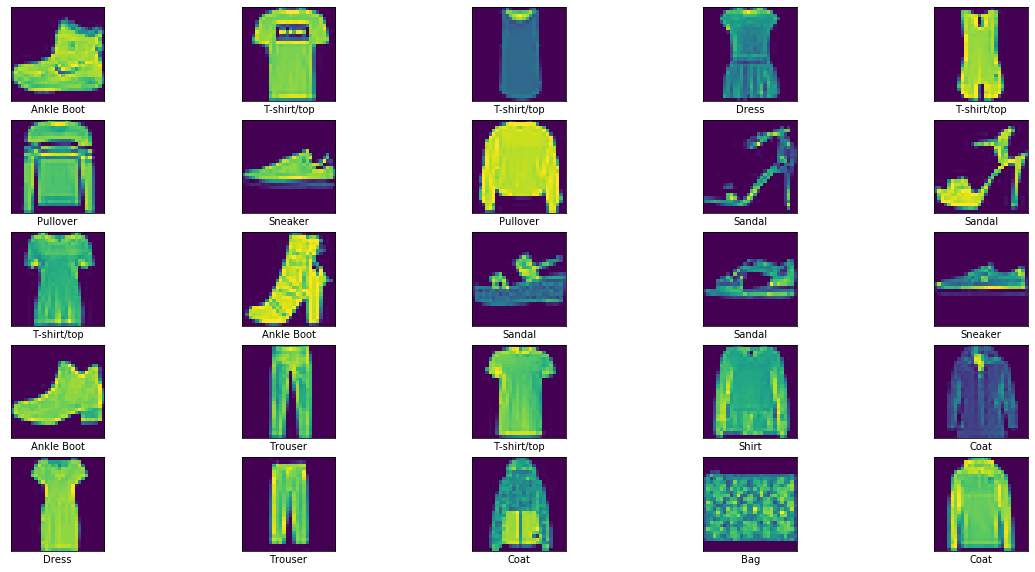

In [11]:
#write code below
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()


## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [12]:
#create a model having the layers defined below this cell

model = Sequential([
    Flatten(),
    Dense(units=128,input_dim=784,activation='relu'),
    BatchNormalization(),
    Dense(units=10)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers with a 'BatchNormalization()' layer in between the 2 dense layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes. 
The Batch Normalization layer works by performing a series of operations on the incoming input data. The set of operations involves standardization, normalization, rescaling and shifting of offset of input values coming into the BN layer.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [13]:
#compile the model using model.compile using the adam optimizer, SparseCategoricalCrossentropy loss and accuracy as metrics
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])


## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [14]:
#write code below setting epochs=10:
model_result = model.fit(train_images, train_labels, batch_size=128, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4785 - acc: 0.8322
Epoch 2/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3669 - acc: 0.8689
Epoch 3/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3347 - acc: 0.8790
Epoch 4/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3168 - acc: 0.8857
Epoch 5/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2965 - acc: 0.8916
Epoch 6/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2891 - acc: 0.8937
Epoch 7/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2754 - acc: 0.8990
Epoch 8/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2665 - acc: 0.9018
Epoch 9/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2612 - acc: 0.9033
Epoch 10/10
60000/60000 [==============================] - 2s 29us/sample - loss: 

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset using model.evaluate():

In [15]:
#complete code below

test_loss, test_acc = model.evaluate(test_images,test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.3797 - acc: 0.8676

Test accuracy: 0.8676


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [16]:
#complete code below
from tensorflow.keras.layers import Softmax
probability_model = Sequential([model,Softmax()])

In [17]:
#predict on the test_images using the probability_model
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [18]:
predictions[0]

array([1.0316747e-04, 1.7515001e-06, 3.7974934e-04, 2.6848126e-04,
       1.6318414e-04, 4.6735302e-02, 3.5687775e-05, 6.4217234e-03,
       2.3341499e-06, 9.4588870e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [19]:
#use np.argmax to find the highest confidence value
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [20]:
test_labels[0]

9

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.
Plot should look like this:
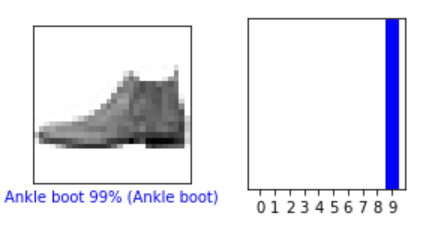

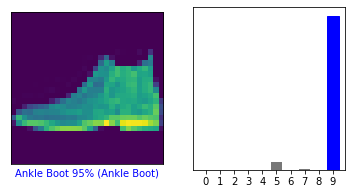

In [21]:
#plot the 0th image and next to that plot a bar graph of the predicted values for that image
#  if predicted_label is the same as the actual label of the image then the x_axis label should be in blue, whereas 
# if the predicted_label is not the same as the actual label of the image then the x_axis label should be in red
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

    
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()



Similarly plot the image and predicted values for another value in the test_images

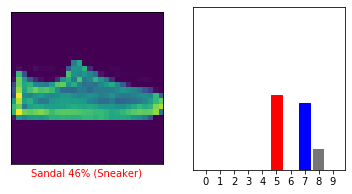

In [22]:
#write code below
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

plot several images with their predictions. Note that the model can be wrong even when very confident.

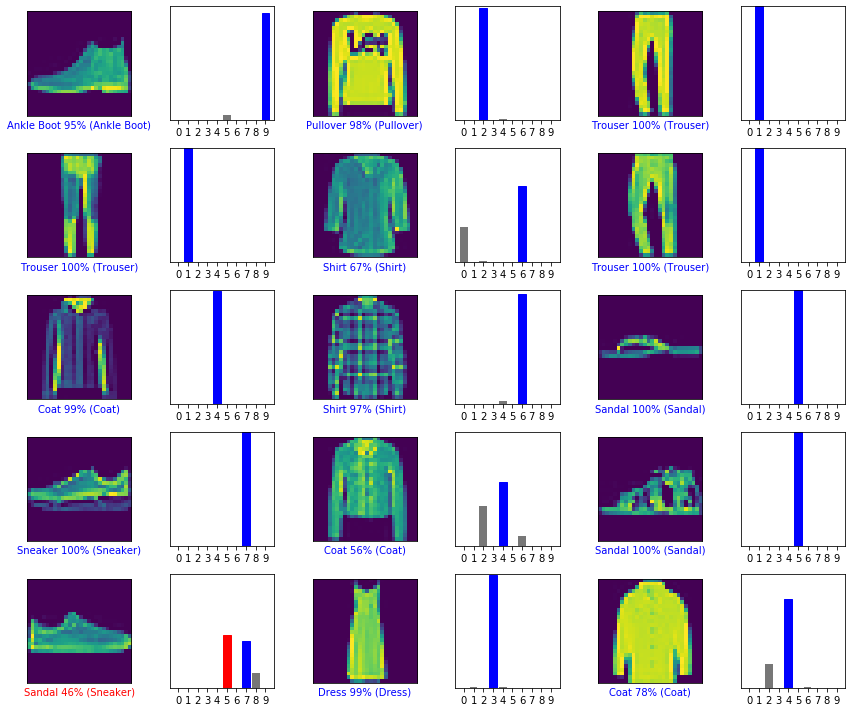

In [23]:
# Plot the first 10 test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [24]:
# Grab an image from the test dataset.
img = test_images[123]



`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [25]:
# Add the image to a batch where it's the only member.
#hint: use np.expand_dims
#complete code below
img = np.expand_dims(img,0)

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [26]:
#complete code below
predictions_single = probability_model.predict(img)

print(predictions_single)

[[7.5466278e-07 1.1417868e-06 1.3468947e-07 1.7370094e-07 6.9271505e-07
  4.4725042e-05 2.6288257e-07 1.2903220e-04 1.3359979e-05 9.9980980e-01]]


`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [27]:
#print the predicted class for the image
print(np.argmax(predictions_single))

9


# Regularization
In mathematics, statistics, and computer science, particularly in machine learning and inverse problems, regularization is the process of adding information in order to solve an ill-posed problem or to prevent overfitting.

In order to improve the performance of the model, we use different regularization techniques. There are several techniques, but we will discuss 4 main techniques.

1. L1 Regularization
2. L2 Regularization
3. Dropout
4. Batch Normalization

In [28]:
#Basic pre-processing
#we're importing the iris dataset from sklearn for our model
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data
y = iris.target
y = to_categorical(y) #converting output to one-hot vector
ss = StandardScaler() #standardizing the data
X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=16)

In [29]:
#explore the data (X and y) however you like, (using info(), describe, graphs, etc.) and write any 4 lines on what you understood about the dataset
X[0]
#Solution can be anything


array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

And the model predicts a label as expected.

In [30]:
#model building

#run the code given below and observe the performance of this simple model having no regularization

model1 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    Dense(512//2, activation='tanh'),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
print(model1.summary())
model1.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist1 = model1.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               2560      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 99        
Total params: 177,219
Trainable params: 177,219
Non-trainable params: 0
________________________________________________

Epoch 37/150
112/112 [==============================] - 0s 62us/sample - loss: 0.4795 - acc: 0.8661 - mean_squared_error: 0.0825 - val_loss: 0.5643 - val_acc: 0.7632 - val_mean_squared_error: 0.1075
Epoch 38/150
112/112 [==============================] - 0s 53us/sample - loss: 0.4730 - acc: 0.8661 - mean_squared_error: 0.0812 - val_loss: 0.5594 - val_acc: 0.7632 - val_mean_squared_error: 0.1067
Epoch 39/150
112/112 [==============================] - 0s 71us/sample - loss: 0.4667 - acc: 0.8661 - mean_squared_error: 0.0801 - val_loss: 0.5546 - val_acc: 0.7632 - val_mean_squared_error: 0.1060
Epoch 40/150
112/112 [==============================] - 0s 71us/sample - loss: 0.4607 - acc: 0.8661 - mean_squared_error: 0.0790 - val_loss: 0.5500 - val_acc: 0.7632 - val_mean_squared_error: 0.1054
Epoch 41/150
112/112 [==============================] - 0s 71us/sample - loss: 0.4549 - acc: 0.8661 - mean_squared_error: 0.0779 - val_loss: 0.5456 - val_acc: 0.7632 - val_mean_squared_error: 0.1048
Epoch

Epoch 79/150
112/112 [==============================] - 0s 62us/sample - loss: 0.3208 - acc: 0.9107 - mean_squared_error: 0.0545 - val_loss: 0.4418 - val_acc: 0.7368 - val_mean_squared_error: 0.0907
Epoch 80/150
112/112 [==============================] - 0s 71us/sample - loss: 0.3185 - acc: 0.9107 - mean_squared_error: 0.0541 - val_loss: 0.4400 - val_acc: 0.7632 - val_mean_squared_error: 0.0905
Epoch 81/150
112/112 [==============================] - 0s 62us/sample - loss: 0.3163 - acc: 0.9107 - mean_squared_error: 0.0537 - val_loss: 0.4382 - val_acc: 0.7632 - val_mean_squared_error: 0.0902
Epoch 82/150
112/112 [==============================] - 0s 71us/sample - loss: 0.3141 - acc: 0.9107 - mean_squared_error: 0.0533 - val_loss: 0.4364 - val_acc: 0.7632 - val_mean_squared_error: 0.0900
Epoch 83/150
112/112 [==============================] - 0s 54us/sample - loss: 0.3119 - acc: 0.9107 - mean_squared_error: 0.0529 - val_loss: 0.4347 - val_acc: 0.7632 - val_mean_squared_error: 0.0897
Epoch

112/112 [==============================] - 0s 71us/sample - loss: 0.2484 - acc: 0.9375 - mean_squared_error: 0.0414 - val_loss: 0.3798 - val_acc: 0.7632 - val_mean_squared_error: 0.0807
Epoch 121/150
112/112 [==============================] - 0s 71us/sample - loss: 0.2470 - acc: 0.9375 - mean_squared_error: 0.0412 - val_loss: 0.3784 - val_acc: 0.7632 - val_mean_squared_error: 0.0805
Epoch 122/150
112/112 [==============================] - 0s 62us/sample - loss: 0.2456 - acc: 0.9375 - mean_squared_error: 0.0409 - val_loss: 0.3770 - val_acc: 0.7632 - val_mean_squared_error: 0.0802
Epoch 123/150
112/112 [==============================] - 0s 71us/sample - loss: 0.2442 - acc: 0.9375 - mean_squared_error: 0.0406 - val_loss: 0.3756 - val_acc: 0.7632 - val_mean_squared_error: 0.0799
Epoch 124/150
112/112 [==============================] - 0s 53us/sample - loss: 0.2428 - acc: 0.9375 - mean_squared_error: 0.0404 - val_loss: 0.3743 - val_acc: 0.7632 - val_mean_squared_error: 0.0797
Epoch 125/150


In [31]:
#After training the model, evaluate the model and find the  loss, accuracy and mse on the test set using the evaluate() function
#print the loss, accuracy and MSE
test_loss,test_acc,mse = model1.evaluate(X_test,y_test)
print("test loss: ",test_loss)
print("test acc: ",test_acc)
print("mse: ",mse)

38/38 [==============================] - 0s 131us/sample - loss: 0.3409 - acc: 0.8158 - mean_squared_error: 0.0731
test loss:  0.3408631941205577
test acc:  0.81578946
mse:  0.07305812


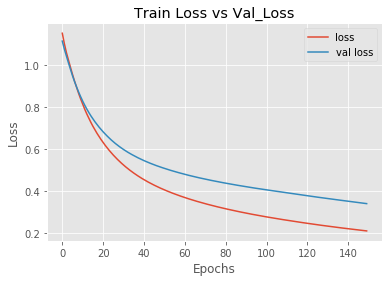

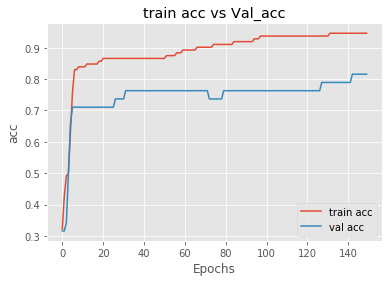

In [32]:
#Observe the plots for Validation Loss and Training Loss.

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist1.history['loss'], label = 'loss')
plt.plot(hist1.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# we observe that validation loss is increasing as compared to training loss. 
# This increase in training loss shows that our model is overfitted.

#similarly we plot for model accuracy 
plt.plot(hist1.history['acc'], label = 'train acc')
plt.plot(hist1.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

#This again shows that validation accuracy is low as compared to training accuracy, which again shows signs of overfitting. 




## L1 Regularization:
 


In [33]:

#A commonly used Regularization technique is L1 regularization, also known as Lasso Regularization.

#The main concept of L1 Regularization is that we have to penalize our weights by adding absolute values of weight
#in our loss function, multiplied by a regularization parameter lambda λ, where λ is manually tuned to be greater than 0.



#to implement L1 regularization, create another model called model2 similar to model1, this time add an extra parameter 
#kernel_regularizer, which we set it to ‘l1’ for L1 Regularization in the first Dense layer:
model2 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape,kernel_regularizer='l1'),
    Dense(512//2, activation='tanh'),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model2.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist2 = model2.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))

Train on 112 samples, validate on 38 samples
Epoch 1/150
112/112 [==============================] - 0s 2ms/sample - loss: 2.1776 - acc: 0.2232 - mean_squared_error: 0.2203 - val_loss: 2.1347 - val_acc: 0.3684 - val_mean_squared_error: 0.2105
Epoch 2/150
112/112 [==============================] - 0s 80us/sample - loss: 2.1262 - acc: 0.4911 - mean_squared_error: 0.2084 - val_loss: 2.1007 - val_acc: 0.5263 - val_mean_squared_error: 0.2032
Epoch 3/150
112/112 [==============================] - 0s 71us/sample - loss: 2.0848 - acc: 0.6875 - mean_squared_error: 0.1992 - val_loss: 2.0731 - val_acc: 0.6579 - val_mean_squared_error: 0.1973
Epoch 4/150
112/112 [==============================] - 0s 71us/sample - loss: 2.0511 - acc: 0.7232 - mean_squared_error: 0.1919 - val_loss: 2.0497 - val_acc: 0.6579 - val_mean_squared_error: 0.1924
Epoch 5/150
112/112 [==============================] - 0s 71us/sample - loss: 2.0235 - acc: 0.7589 - mean_squared_error: 0.1859 - val_loss: 2.0288 - val_acc: 0.6842

Epoch 42/150
112/112 [==============================] - 0s 62us/sample - loss: 1.4845 - acc: 0.8393 - mean_squared_error: 0.0830 - val_loss: 1.5605 - val_acc: 0.7368 - val_mean_squared_error: 0.1056
Epoch 43/150
112/112 [==============================] - 0s 71us/sample - loss: 1.4788 - acc: 0.8393 - mean_squared_error: 0.0823 - val_loss: 1.5557 - val_acc: 0.7368 - val_mean_squared_error: 0.1052
Epoch 44/150
112/112 [==============================] - 0s 80us/sample - loss: 1.4732 - acc: 0.8393 - mean_squared_error: 0.0817 - val_loss: 1.5511 - val_acc: 0.7368 - val_mean_squared_error: 0.1048
Epoch 45/150
112/112 [==============================] - 0s 98us/sample - loss: 1.4677 - acc: 0.8482 - mean_squared_error: 0.0811 - val_loss: 1.5465 - val_acc: 0.7368 - val_mean_squared_error: 0.1044
Epoch 46/150
112/112 [==============================] - 0s 98us/sample - loss: 1.4624 - acc: 0.8482 - mean_squared_error: 0.0804 - val_loss: 1.5420 - val_acc: 0.7368 - val_mean_squared_error: 0.1041
Epoch

Epoch 84/150
112/112 [==============================] - 0s 71us/sample - loss: 1.2985 - acc: 0.8839 - mean_squared_error: 0.0628 - val_loss: 1.3986 - val_acc: 0.7632 - val_mean_squared_error: 0.0928
Epoch 85/150
112/112 [==============================] - 0s 62us/sample - loss: 1.2949 - acc: 0.8839 - mean_squared_error: 0.0624 - val_loss: 1.3953 - val_acc: 0.7632 - val_mean_squared_error: 0.0926
Epoch 86/150
112/112 [==============================] - 0s 62us/sample - loss: 1.2912 - acc: 0.8839 - mean_squared_error: 0.0620 - val_loss: 1.3920 - val_acc: 0.7632 - val_mean_squared_error: 0.0923
Epoch 87/150
112/112 [==============================] - 0s 62us/sample - loss: 1.2876 - acc: 0.8839 - mean_squared_error: 0.0617 - val_loss: 1.3886 - val_acc: 0.7632 - val_mean_squared_error: 0.0920
Epoch 88/150
112/112 [==============================] - 0s 71us/sample - loss: 1.2840 - acc: 0.8839 - mean_squared_error: 0.0613 - val_loss: 1.3853 - val_acc: 0.7632 - val_mean_squared_error: 0.0918
Epoch

Epoch 126/150
112/112 [==============================] - 0s 62us/sample - loss: 1.1589 - acc: 0.9286 - mean_squared_error: 0.0491 - val_loss: 1.2706 - val_acc: 0.7895 - val_mean_squared_error: 0.0828
Epoch 127/150
112/112 [==============================] - 0s 62us/sample - loss: 1.1559 - acc: 0.9286 - mean_squared_error: 0.0488 - val_loss: 1.2679 - val_acc: 0.7895 - val_mean_squared_error: 0.0826
Epoch 128/150
112/112 [==============================] - 0s 62us/sample - loss: 1.1529 - acc: 0.9286 - mean_squared_error: 0.0486 - val_loss: 1.2651 - val_acc: 0.7895 - val_mean_squared_error: 0.0824
Epoch 129/150
112/112 [==============================] - 0s 71us/sample - loss: 1.1499 - acc: 0.9286 - mean_squared_error: 0.0483 - val_loss: 1.2624 - val_acc: 0.7895 - val_mean_squared_error: 0.0823
Epoch 130/150
112/112 [==============================] - 0s 71us/sample - loss: 1.1469 - acc: 0.9286 - mean_squared_error: 0.0480 - val_loss: 1.2596 - val_acc: 0.7895 - val_mean_squared_error: 0.0820


In [34]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set
test_loss,test_acc,mse = model2.evaluate(X_test,y_test)
print("test loss: ",test_loss)
print("test acc: ",test_acc)
print("mse: ",mse)


38/38 [==============================] - 0s 131us/sample - loss: 1.2058 - acc: 0.7632 - mean_squared_error: 0.0781
test loss:  1.2057515320024992
test acc:  0.7631579
mse:  0.078068726


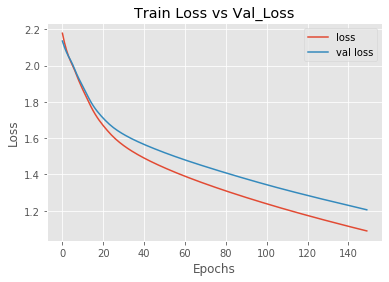

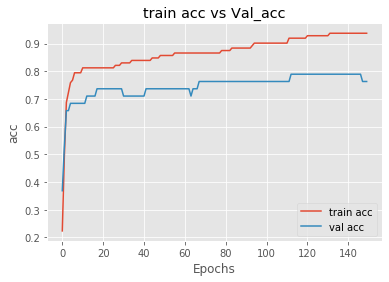

In [35]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist2.history['loss'], label = 'loss')
plt.plot(hist2.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(hist2.history['acc'], label = 'train acc')
plt.plot(hist2.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()


 


In [36]:

# create a new model model3, similar to model1 and model2 and add l1 in more layers to check if it improves the model or not.
model3 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape,kernel_regularizer='l1'),
    Dense(512//2, activation='tanh',kernel_regularizer='l1'),
    Dense(512//4, activation='tanh',kernel_regularizer='l1'),
    Dense(512//8, activation='tanh',kernel_regularizer='l1'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model3.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist3 = model3.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))



Train on 112 samples, validate on 38 samples
Epoch 1/150
112/112 [==============================] - 0s 3ms/sample - loss: 87.6425 - acc: 0.2232 - mean_squared_error: 0.2333 - val_loss: 87.4187 - val_acc: 0.3158 - val_mean_squared_error: 0.2220
Epoch 2/150
112/112 [==============================] - 0s 80us/sample - loss: 87.4147 - acc: 0.2946 - mean_squared_error: 0.2214 - val_loss: 87.2058 - val_acc: 0.3947 - val_mean_squared_error: 0.2129
Epoch 3/150
112/112 [==============================] - 0s 71us/sample - loss: 87.1949 - acc: 0.4286 - mean_squared_error: 0.2108 - val_loss: 86.9984 - val_acc: 0.6316 - val_mean_squared_error: 0.2049
Epoch 4/150
112/112 [==============================] - 0s 71us/sample - loss: 86.9813 - acc: 0.7232 - mean_squared_error: 0.2013 - val_loss: 86.7939 - val_acc: 0.7895 - val_mean_squared_error: 0.1973
Epoch 5/150
112/112 [==============================] - 0s 80us/sample - loss: 86.7715 - acc: 0.8304 - mean_squared_error: 0.1925 - val_loss: 86.5924 - val_a

Epoch 42/150
112/112 [==============================] - 0s 62us/sample - loss: 80.0222 - acc: 0.8661 - mean_squared_error: 0.0798 - val_loss: 79.9545 - val_acc: 0.7632 - val_mean_squared_error: 0.1063
Epoch 43/150
112/112 [==============================] - 0s 71us/sample - loss: 79.8525 - acc: 0.8661 - mean_squared_error: 0.0790 - val_loss: 79.7856 - val_acc: 0.7632 - val_mean_squared_error: 0.1058
Epoch 44/150
112/112 [==============================] - 0s 71us/sample - loss: 79.6830 - acc: 0.8661 - mean_squared_error: 0.0782 - val_loss: 79.6170 - val_acc: 0.7632 - val_mean_squared_error: 0.1053
Epoch 45/150
112/112 [==============================] - 0s 62us/sample - loss: 79.5139 - acc: 0.8661 - mean_squared_error: 0.0775 - val_loss: 79.4486 - val_acc: 0.7632 - val_mean_squared_error: 0.1048
Epoch 46/150
112/112 [==============================] - 0s 71us/sample - loss: 79.3450 - acc: 0.8661 - mean_squared_error: 0.0768 - val_loss: 79.2805 - val_acc: 0.7632 - val_mean_squared_error: 0.

Epoch 83/150
112/112 [==============================] - 0s 71us/sample - loss: 73.2773 - acc: 0.9107 - mean_squared_error: 0.0604 - val_loss: 73.2317 - val_acc: 0.7632 - val_mean_squared_error: 0.0926
Epoch 84/150
112/112 [==============================] - 0s 80us/sample - loss: 73.1176 - acc: 0.9107 - mean_squared_error: 0.0601 - val_loss: 73.0722 - val_acc: 0.7632 - val_mean_squared_error: 0.0923
Epoch 85/150
112/112 [==============================] - 0s 71us/sample - loss: 72.9579 - acc: 0.9107 - mean_squared_error: 0.0598 - val_loss: 72.9130 - val_acc: 0.7632 - val_mean_squared_error: 0.0921
Epoch 86/150
112/112 [==============================] - 0s 80us/sample - loss: 72.7986 - acc: 0.9107 - mean_squared_error: 0.0595 - val_loss: 72.7539 - val_acc: 0.7632 - val_mean_squared_error: 0.0918
Epoch 87/150
112/112 [==============================] - 0s 71us/sample - loss: 72.6393 - acc: 0.9107 - mean_squared_error: 0.0591 - val_loss: 72.5951 - val_acc: 0.7368 - val_mean_squared_error: 0.

Epoch 124/150
112/112 [==============================] - 0s 62us/sample - loss: 66.8912 - acc: 0.9375 - mean_squared_error: 0.0502 - val_loss: 66.8569 - val_acc: 0.7632 - val_mean_squared_error: 0.0838
Epoch 125/150
112/112 [==============================] - 0s 62us/sample - loss: 66.7396 - acc: 0.9375 - mean_squared_error: 0.0500 - val_loss: 66.7055 - val_acc: 0.7632 - val_mean_squared_error: 0.0836
Epoch 126/150
112/112 [==============================] - 0s 71us/sample - loss: 66.5883 - acc: 0.9375 - mean_squared_error: 0.0498 - val_loss: 66.5542 - val_acc: 0.7632 - val_mean_squared_error: 0.0835
Epoch 127/150
112/112 [==============================] - 0s 71us/sample - loss: 66.4371 - acc: 0.9375 - mean_squared_error: 0.0497 - val_loss: 66.4032 - val_acc: 0.7632 - val_mean_squared_error: 0.0833
Epoch 128/150
112/112 [==============================] - 0s 80us/sample - loss: 66.2861 - acc: 0.9375 - mean_squared_error: 0.0495 - val_loss: 66.2522 - val_acc: 0.7632 - val_mean_squared_erro

In [37]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

test_loss,test_acc,mse = model3.evaluate(X_test,y_test)
print("test loss: ",test_loss)
print("test acc: ",test_acc)
print("mse: ",mse)


38/38 [==============================] - 0s 158us/sample - loss: 62.9792 - acc: 0.7632 - mean_squared_error: 0.0787
test loss:  62.97922556023849
test acc:  0.7631579
mse:  0.07866132


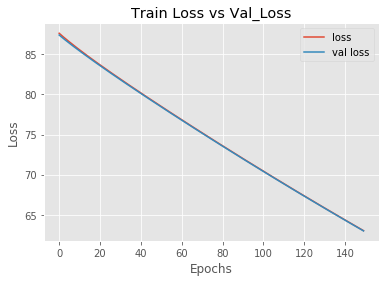

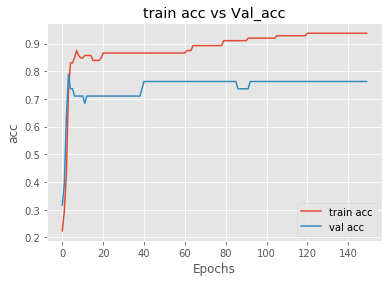

In [38]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before
plt.style.use('ggplot')
plt.plot(hist3.history['loss'], label = 'loss')
plt.plot(hist3.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(hist3.history['acc'], label = 'train acc')
plt.plot(hist3.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()



## L2 Regularization


In [39]:
 

# L2 Regularization is another regularization technique which is also known as Ridge regularization. 
#In L2 regularization we add the squared magnitude of weights to penalize our lost function.

#to implement L2 regularization, create another model called model4 similar to our initial basic model, 
#this time add an extra parameter kernel_regularizer, which we set to ‘l2’ for L1 Regularization in the first Dense layer.
#compile and run the model
model4 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape,kernel_regularizer='l2'),
    Dense(512//2, activation='tanh'),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model4.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist4 = model4.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))

 


Train on 112 samples, validate on 38 samples
Epoch 1/150
112/112 [==============================] - 0s 2ms/sample - loss: 1.1686 - acc: 0.4821 - mean_squared_error: 0.2225 - val_loss: 1.1379 - val_acc: 0.3947 - val_mean_squared_error: 0.2166
Epoch 2/150
112/112 [==============================] - 0s 71us/sample - loss: 1.1167 - acc: 0.5179 - mean_squared_error: 0.2114 - val_loss: 1.0926 - val_acc: 0.3947 - val_mean_squared_error: 0.2064
Epoch 3/150
112/112 [==============================] - 0s 89us/sample - loss: 1.0702 - acc: 0.5268 - mean_squared_error: 0.2009 - val_loss: 1.0538 - val_acc: 0.3947 - val_mean_squared_error: 0.1975
Epoch 4/150
112/112 [==============================] - 0s 80us/sample - loss: 1.0293 - acc: 0.5268 - mean_squared_error: 0.1914 - val_loss: 1.0213 - val_acc: 0.5263 - val_mean_squared_error: 0.1899
Epoch 5/150
112/112 [==============================] - 0s 80us/sample - loss: 0.9939 - acc: 0.6518 - mean_squared_error: 0.1831 - val_loss: 0.9927 - val_acc: 0.6579

Epoch 42/150
112/112 [==============================] - 0s 71us/sample - loss: 0.5067 - acc: 0.8661 - mean_squared_error: 0.0721 - val_loss: 0.6138 - val_acc: 0.7368 - val_mean_squared_error: 0.1016
Epoch 43/150
112/112 [==============================] - 0s 71us/sample - loss: 0.5018 - acc: 0.8661 - mean_squared_error: 0.0712 - val_loss: 0.6100 - val_acc: 0.7368 - val_mean_squared_error: 0.1011
Epoch 44/150
112/112 [==============================] - 0s 71us/sample - loss: 0.4970 - acc: 0.8661 - mean_squared_error: 0.0703 - val_loss: 0.6063 - val_acc: 0.7368 - val_mean_squared_error: 0.1005
Epoch 45/150
112/112 [==============================] - 0s 62us/sample - loss: 0.4924 - acc: 0.8661 - mean_squared_error: 0.0695 - val_loss: 0.6027 - val_acc: 0.7368 - val_mean_squared_error: 0.1000
Epoch 46/150
112/112 [==============================] - 0s 71us/sample - loss: 0.4880 - acc: 0.8661 - mean_squared_error: 0.0687 - val_loss: 0.5992 - val_acc: 0.7632 - val_mean_squared_error: 0.0995
Epoch

Epoch 84/150
112/112 [==============================] - 0s 71us/sample - loss: 0.3731 - acc: 0.9286 - mean_squared_error: 0.0482 - val_loss: 0.5057 - val_acc: 0.7632 - val_mean_squared_error: 0.0862
Epoch 85/150
112/112 [==============================] - 0s 62us/sample - loss: 0.3706 - acc: 0.9375 - mean_squared_error: 0.0477 - val_loss: 0.5033 - val_acc: 0.7632 - val_mean_squared_error: 0.0858
Epoch 86/150
112/112 [==============================] - 0s 71us/sample - loss: 0.3681 - acc: 0.9375 - mean_squared_error: 0.0472 - val_loss: 0.5008 - val_acc: 0.7632 - val_mean_squared_error: 0.0853
Epoch 87/150
112/112 [==============================] - 0s 80us/sample - loss: 0.3656 - acc: 0.9375 - mean_squared_error: 0.0467 - val_loss: 0.4984 - val_acc: 0.7632 - val_mean_squared_error: 0.0849
Epoch 88/150
112/112 [==============================] - 0s 71us/sample - loss: 0.3631 - acc: 0.9375 - mean_squared_error: 0.0462 - val_loss: 0.4962 - val_acc: 0.7632 - val_mean_squared_error: 0.0845
Epoch

112/112 [==============================] - 0s 71us/sample - loss: 0.2951 - acc: 0.9554 - mean_squared_error: 0.0334 - val_loss: 0.4385 - val_acc: 0.8158 - val_mean_squared_error: 0.0745
Epoch 126/150
112/112 [==============================] - 0s 71us/sample - loss: 0.2936 - acc: 0.9643 - mean_squared_error: 0.0332 - val_loss: 0.4371 - val_acc: 0.8158 - val_mean_squared_error: 0.0743
Epoch 127/150
112/112 [==============================] - 0s 80us/sample - loss: 0.2922 - acc: 0.9643 - mean_squared_error: 0.0329 - val_loss: 0.4357 - val_acc: 0.8158 - val_mean_squared_error: 0.0740
Epoch 128/150
112/112 [==============================] - 0s 71us/sample - loss: 0.2907 - acc: 0.9554 - mean_squared_error: 0.0326 - val_loss: 0.4343 - val_acc: 0.8158 - val_mean_squared_error: 0.0737
Epoch 129/150
112/112 [==============================] - 0s 71us/sample - loss: 0.2893 - acc: 0.9554 - mean_squared_error: 0.0324 - val_loss: 0.4329 - val_acc: 0.8158 - val_mean_squared_error: 0.0735
Epoch 130/150


In [40]:

#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

test_loss,test_acc,mse = model4.evaluate(X_test,y_test)
print("test loss: ",test_loss)
print("test acc: ",test_acc)
print("mse: ",mse)

38/38 [==============================] - 0s 131us/sample - loss: 0.4000 - acc: 0.8421 - mean_squared_error: 0.0666
test loss:  0.3999893790797183
test acc:  0.84210527
mse:  0.066592954


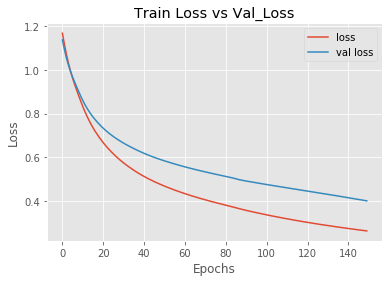

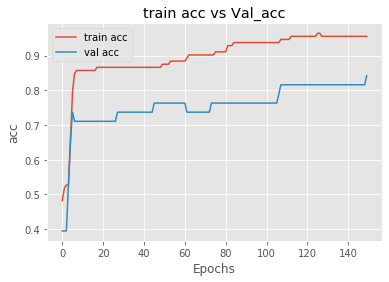

In [41]:

# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.style.use('ggplot')
plt.plot(hist4.history['loss'], label = 'loss')
plt.plot(hist4.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(hist4.history['acc'], label = 'train acc')
plt.plot(hist4.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()


In [42]:
# Now create model5 having similar to the above models having L2 in all other layers.

model5 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape,kernel_regularizer='l2'),
    Dense(512//2, activation='tanh',kernel_regularizer='l2'),
    Dense(512//4, activation='tanh',kernel_regularizer='l2'),
    Dense(512//8, activation='tanh',kernel_regularizer='l2'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model5.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist5 = model5.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))

Train on 112 samples, validate on 38 samples
Epoch 1/150
112/112 [==============================] - 0s 2ms/sample - loss: 7.3170 - acc: 0.1696 - mean_squared_error: 0.2576 - val_loss: 7.2389 - val_acc: 0.2105 - val_mean_squared_error: 0.2430
Epoch 2/150
112/112 [==============================] - 0s 81us/sample - loss: 7.2423 - acc: 0.1786 - mean_squared_error: 0.2437 - val_loss: 7.1756 - val_acc: 0.2368 - val_mean_squared_error: 0.2307
Epoch 3/150
112/112 [==============================] - 0s 80us/sample - loss: 7.1723 - acc: 0.2411 - mean_squared_error: 0.2298 - val_loss: 7.1171 - val_acc: 0.2632 - val_mean_squared_error: 0.2187
Epoch 4/150
112/112 [==============================] - 0s 71us/sample - loss: 7.1087 - acc: 0.2857 - mean_squared_error: 0.2166 - val_loss: 7.0725 - val_acc: 0.3421 - val_mean_squared_error: 0.2093
Epoch 5/150
112/112 [==============================] - 0s 72us/sample - loss: 7.0568 - acc: 0.4286 - mean_squared_error: 0.2055 - val_loss: 7.0398 - val_acc: 0.6053

Epoch 42/150
112/112 [==============================] - 0s 71us/sample - loss: 6.4453 - acc: 0.8482 - mean_squared_error: 0.0877 - val_loss: 6.5252 - val_acc: 0.7105 - val_mean_squared_error: 0.1116
Epoch 43/150
112/112 [==============================] - 0s 71us/sample - loss: 6.4374 - acc: 0.8482 - mean_squared_error: 0.0867 - val_loss: 6.5183 - val_acc: 0.7105 - val_mean_squared_error: 0.1109
Epoch 44/150
112/112 [==============================] - 0s 80us/sample - loss: 6.4297 - acc: 0.8482 - mean_squared_error: 0.0857 - val_loss: 6.5114 - val_acc: 0.7368 - val_mean_squared_error: 0.1102
Epoch 45/150
112/112 [==============================] - 0s 71us/sample - loss: 6.4221 - acc: 0.8482 - mean_squared_error: 0.0847 - val_loss: 6.5048 - val_acc: 0.7368 - val_mean_squared_error: 0.1095
Epoch 46/150
112/112 [==============================] - 0s 71us/sample - loss: 6.4147 - acc: 0.8482 - mean_squared_error: 0.0837 - val_loss: 6.4983 - val_acc: 0.7368 - val_mean_squared_error: 0.1088
Epoch

Epoch 84/150
112/112 [==============================] - 0s 71us/sample - loss: 6.2036 - acc: 0.8929 - mean_squared_error: 0.0603 - val_loss: 6.3058 - val_acc: 0.7632 - val_mean_squared_error: 0.0915
Epoch 85/150
112/112 [==============================] - 0s 71us/sample - loss: 6.1992 - acc: 0.8929 - mean_squared_error: 0.0599 - val_loss: 6.3016 - val_acc: 0.7632 - val_mean_squared_error: 0.0912
Epoch 86/150
112/112 [==============================] - 0s 62us/sample - loss: 6.1948 - acc: 0.8929 - mean_squared_error: 0.0595 - val_loss: 6.2975 - val_acc: 0.7632 - val_mean_squared_error: 0.0909
Epoch 87/150
112/112 [==============================] - 0s 71us/sample - loss: 6.1904 - acc: 0.8929 - mean_squared_error: 0.0591 - val_loss: 6.2934 - val_acc: 0.7632 - val_mean_squared_error: 0.0906
Epoch 88/150
112/112 [==============================] - 0s 71us/sample - loss: 6.1860 - acc: 0.9018 - mean_squared_error: 0.0586 - val_loss: 6.2893 - val_acc: 0.7632 - val_mean_squared_error: 0.0903
Epoch

112/112 [==============================] - 0s 71us/sample - loss: 6.0413 - acc: 0.9286 - mean_squared_error: 0.0465 - val_loss: 6.1530 - val_acc: 0.7895 - val_mean_squared_error: 0.0809
Epoch 126/150
112/112 [==============================] - 0s 71us/sample - loss: 6.0377 - acc: 0.9375 - mean_squared_error: 0.0463 - val_loss: 6.1495 - val_acc: 0.7895 - val_mean_squared_error: 0.0806
Epoch 127/150
112/112 [==============================] - 0s 71us/sample - loss: 6.0341 - acc: 0.9375 - mean_squared_error: 0.0460 - val_loss: 6.1461 - val_acc: 0.7895 - val_mean_squared_error: 0.0804
Epoch 128/150
112/112 [==============================] - 0s 71us/sample - loss: 6.0306 - acc: 0.9375 - mean_squared_error: 0.0457 - val_loss: 6.1427 - val_acc: 0.7895 - val_mean_squared_error: 0.0802
Epoch 129/150
112/112 [==============================] - 0s 71us/sample - loss: 6.0271 - acc: 0.9375 - mean_squared_error: 0.0455 - val_loss: 6.1393 - val_acc: 0.7895 - val_mean_squared_error: 0.0800
Epoch 130/150


In [43]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set
test_loss,test_acc,mse = model5.evaluate(X_test,y_test)
print("test loss: ",test_loss)
print("test acc: ",test_acc)
print("mse: ",mse)

38/38 [==============================] - 0s 105us/sample - loss: 6.0689 - acc: 0.7632 - mean_squared_error: 0.0753
test loss:  6.068919834337737
test acc:  0.7631579
mse:  0.07531274


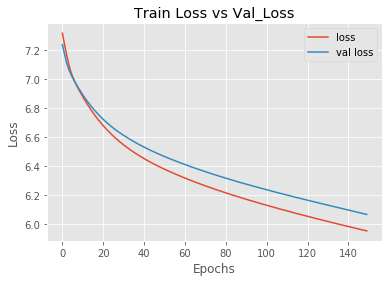

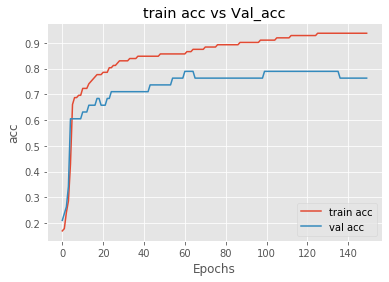

In [44]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.style.use('ggplot')
plt.plot(hist5.history['loss'], label = 'loss')
plt.plot(hist5.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(hist5.history['acc'], label = 'train acc')
plt.plot(hist5.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()



 

## Dropout
 


In [45]:

#Another common way to avoid regularization is by using the Dropout technique. 
#The main idea behind using dropout is that we randomly turn off some neurons in our layer based on some probability.

# Create a model6 having same layers as the basic model. Add a dropout layer in this model, 
#lets say after the 1st dense layer, and set dropout rate as 50%
import tensorflow as tf
from tensorflow.keras.layers import Dropout

model6 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    Dropout(0.5),
    Dense(512//2, activation='tanh'),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model6.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist6 = model6.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))



Train on 112 samples, validate on 38 samples
Epoch 1/150
112/112 [==============================] - 0s 3ms/sample - loss: 1.0764 - acc: 0.3125 - mean_squared_error: 0.2177 - val_loss: 1.0475 - val_acc: 0.5263 - val_mean_squared_error: 0.2103
Epoch 2/150
112/112 [==============================] - 0s 89us/sample - loss: 1.0394 - acc: 0.4732 - mean_squared_error: 0.2087 - val_loss: 1.0203 - val_acc: 0.5263 - val_mean_squared_error: 0.2039
Epoch 3/150
112/112 [==============================] - 0s 89us/sample - loss: 0.9985 - acc: 0.5714 - mean_squared_error: 0.1990 - val_loss: 0.9972 - val_acc: 0.5789 - val_mean_squared_error: 0.1985
Epoch 4/150
112/112 [==============================] - 0s 89us/sample - loss: 0.9740 - acc: 0.6429 - mean_squared_error: 0.1933 - val_loss: 0.9733 - val_acc: 0.6053 - val_mean_squared_error: 0.1928
Epoch 5/150
112/112 [==============================] - 0s 80us/sample - loss: 0.9749 - acc: 0.6250 - mean_squared_error: 0.1931 - val_loss: 0.9507 - val_acc: 0.6579

Epoch 42/150
112/112 [==============================] - 0s 71us/sample - loss: 0.4850 - acc: 0.8482 - mean_squared_error: 0.0858 - val_loss: 0.5537 - val_acc: 0.7632 - val_mean_squared_error: 0.1070
Epoch 43/150
112/112 [==============================] - 0s 80us/sample - loss: 0.4789 - acc: 0.8750 - mean_squared_error: 0.0842 - val_loss: 0.5494 - val_acc: 0.7632 - val_mean_squared_error: 0.1064
Epoch 44/150
112/112 [==============================] - 0s 71us/sample - loss: 0.4583 - acc: 0.8661 - mean_squared_error: 0.0800 - val_loss: 0.5448 - val_acc: 0.7632 - val_mean_squared_error: 0.1057
Epoch 45/150
112/112 [==============================] - 0s 71us/sample - loss: 0.4610 - acc: 0.8929 - mean_squared_error: 0.0800 - val_loss: 0.5411 - val_acc: 0.7632 - val_mean_squared_error: 0.1052
Epoch 46/150
112/112 [==============================] - 0s 89us/sample - loss: 0.4542 - acc: 0.8571 - mean_squared_error: 0.0790 - val_loss: 0.5369 - val_acc: 0.7632 - val_mean_squared_error: 0.1046
Epoch

Epoch 84/150
112/112 [==============================] - 0s 80us/sample - loss: 0.3131 - acc: 0.9107 - mean_squared_error: 0.0527 - val_loss: 0.4330 - val_acc: 0.7632 - val_mean_squared_error: 0.0892
Epoch 85/150
112/112 [==============================] - 0s 80us/sample - loss: 0.3263 - acc: 0.9286 - mean_squared_error: 0.0560 - val_loss: 0.4310 - val_acc: 0.7632 - val_mean_squared_error: 0.0889
Epoch 86/150
112/112 [==============================] - 0s 80us/sample - loss: 0.3224 - acc: 0.9107 - mean_squared_error: 0.0557 - val_loss: 0.4295 - val_acc: 0.7632 - val_mean_squared_error: 0.0887
Epoch 87/150
112/112 [==============================] - 0s 89us/sample - loss: 0.3260 - acc: 0.9107 - mean_squared_error: 0.0566 - val_loss: 0.4277 - val_acc: 0.7632 - val_mean_squared_error: 0.0885
Epoch 88/150
112/112 [==============================] - 0s 98us/sample - loss: 0.3123 - acc: 0.9286 - mean_squared_error: 0.0531 - val_loss: 0.4255 - val_acc: 0.7632 - val_mean_squared_error: 0.0881
Epoch

Epoch 125/150
112/112 [==============================] - 0s 89us/sample - loss: 0.2616 - acc: 0.9286 - mean_squared_error: 0.0454 - val_loss: 0.3609 - val_acc: 0.7895 - val_mean_squared_error: 0.0764
Epoch 126/150
112/112 [==============================] - 0s 80us/sample - loss: 0.2359 - acc: 0.9554 - mean_squared_error: 0.0380 - val_loss: 0.3589 - val_acc: 0.7895 - val_mean_squared_error: 0.0759
Epoch 127/150
112/112 [==============================] - 0s 71us/sample - loss: 0.2592 - acc: 0.9286 - mean_squared_error: 0.0449 - val_loss: 0.3573 - val_acc: 0.7895 - val_mean_squared_error: 0.0756
Epoch 128/150
112/112 [==============================] - 0s 80us/sample - loss: 0.2423 - acc: 0.9286 - mean_squared_error: 0.0404 - val_loss: 0.3561 - val_acc: 0.7895 - val_mean_squared_error: 0.0754
Epoch 129/150
112/112 [==============================] - 0s 80us/sample - loss: 0.2480 - acc: 0.9375 - mean_squared_error: 0.0418 - val_loss: 0.3548 - val_acc: 0.7895 - val_mean_squared_error: 0.0752


In [46]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

test_loss,test_acc,mse = model6.evaluate(X_test,y_test)
print("test loss: ",test_loss)
print("test acc: ",test_acc)
print("mse: ",mse)


38/38 [==============================] - 0s 131us/sample - loss: 0.3251 - acc: 0.8158 - mean_squared_error: 0.0691
test loss:  0.3251482993364334
test acc:  0.81578946
mse:  0.0690646


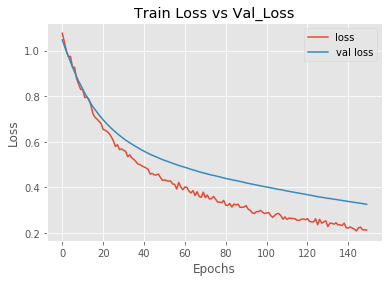

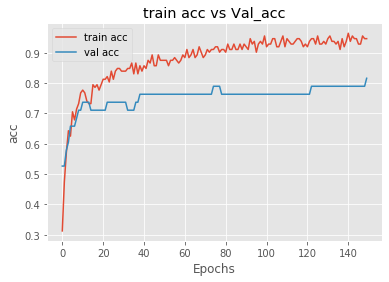

In [47]:

# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before


plt.style.use('ggplot')
plt.plot(hist6.history['loss'], label = 'loss')
plt.plot(hist6.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(hist6.history['acc'], label = 'train acc')
plt.plot(hist6.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [48]:
# Create model7, having more dropout layers, having a dropout rate of your choice

model7 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    Dropout(0.5),
    Dense(512//2, activation='tanh'),
    Dropout(0.5),
    Dense(512//4, activation='tanh'),
    Dropout(0.5),
    Dense(512//8, activation='tanh'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model7.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist7 = model7.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))

Train on 112 samples, validate on 38 samples
Epoch 1/150
112/112 [==============================] - 0s 3ms/sample - loss: 1.2244 - acc: 0.2857 - mean_squared_error: 0.2519 - val_loss: 1.0733 - val_acc: 0.5000 - val_mean_squared_error: 0.2163
Epoch 2/150
112/112 [==============================] - 0s 98us/sample - loss: 1.1079 - acc: 0.3839 - mean_squared_error: 0.2244 - val_loss: 1.0347 - val_acc: 0.5526 - val_mean_squared_error: 0.2074
Epoch 3/150
112/112 [==============================] - 0s 98us/sample - loss: 1.1158 - acc: 0.2679 - mean_squared_error: 0.2272 - val_loss: 0.9990 - val_acc: 0.6053 - val_mean_squared_error: 0.1992
Epoch 4/150
112/112 [==============================] - 0s 98us/sample - loss: 1.0462 - acc: 0.4018 - mean_squared_error: 0.2119 - val_loss: 0.9673 - val_acc: 0.6842 - val_mean_squared_error: 0.1921
Epoch 5/150
112/112 [==============================] - 0s 116us/sample - loss: 1.0492 - acc: 0.3839 - mean_squared_error: 0.2123 - val_loss: 0.9342 - val_acc: 0.710

Epoch 42/150
112/112 [==============================] - 0s 98us/sample - loss: 0.6536 - acc: 0.6607 - mean_squared_error: 0.1294 - val_loss: 0.5337 - val_acc: 0.7105 - val_mean_squared_error: 0.1098
Epoch 43/150
112/112 [==============================] - 0s 98us/sample - loss: 0.6776 - acc: 0.6250 - mean_squared_error: 0.1376 - val_loss: 0.5302 - val_acc: 0.7368 - val_mean_squared_error: 0.1094
Epoch 44/150
112/112 [==============================] - 0s 98us/sample - loss: 0.6567 - acc: 0.6696 - mean_squared_error: 0.1309 - val_loss: 0.5267 - val_acc: 0.7632 - val_mean_squared_error: 0.1089
Epoch 45/150
112/112 [==============================] - 0s 98us/sample - loss: 0.6055 - acc: 0.7321 - mean_squared_error: 0.1213 - val_loss: 0.5237 - val_acc: 0.7632 - val_mean_squared_error: 0.1085
Epoch 46/150
112/112 [==============================] - 0s 107us/sample - loss: 0.6063 - acc: 0.6607 - mean_squared_error: 0.1186 - val_loss: 0.5208 - val_acc: 0.7632 - val_mean_squared_error: 0.1081
Epoc

Epoch 84/150
112/112 [==============================] - 0s 107us/sample - loss: 0.5215 - acc: 0.7500 - mean_squared_error: 0.1048 - val_loss: 0.4587 - val_acc: 0.7368 - val_mean_squared_error: 0.1001
Epoch 85/150
112/112 [==============================] - 0s 107us/sample - loss: 0.5383 - acc: 0.7054 - mean_squared_error: 0.1116 - val_loss: 0.4577 - val_acc: 0.7368 - val_mean_squared_error: 0.1000
Epoch 86/150
112/112 [==============================] - 0s 98us/sample - loss: 0.5347 - acc: 0.7500 - mean_squared_error: 0.1119 - val_loss: 0.4570 - val_acc: 0.7368 - val_mean_squared_error: 0.0999
Epoch 87/150
112/112 [==============================] - 0s 107us/sample - loss: 0.4743 - acc: 0.8304 - mean_squared_error: 0.0940 - val_loss: 0.4563 - val_acc: 0.7368 - val_mean_squared_error: 0.0999
Epoch 88/150
112/112 [==============================] - 0s 98us/sample - loss: 0.4892 - acc: 0.7857 - mean_squared_error: 0.0975 - val_loss: 0.4550 - val_acc: 0.7368 - val_mean_squared_error: 0.0997
Ep

Epoch 125/150
112/112 [==============================] - 0s 134us/sample - loss: 0.4614 - acc: 0.7321 - mean_squared_error: 0.0974 - val_loss: 0.4317 - val_acc: 0.7632 - val_mean_squared_error: 0.0969
Epoch 126/150
112/112 [==============================] - 0s 125us/sample - loss: 0.4250 - acc: 0.8393 - mean_squared_error: 0.0856 - val_loss: 0.4312 - val_acc: 0.7632 - val_mean_squared_error: 0.0968
Epoch 127/150
112/112 [==============================] - 0s 107us/sample - loss: 0.4428 - acc: 0.8304 - mean_squared_error: 0.0902 - val_loss: 0.4303 - val_acc: 0.7632 - val_mean_squared_error: 0.0967
Epoch 128/150
112/112 [==============================] - 0s 116us/sample - loss: 0.4436 - acc: 0.7857 - mean_squared_error: 0.0918 - val_loss: 0.4291 - val_acc: 0.7632 - val_mean_squared_error: 0.0964
Epoch 129/150
112/112 [==============================] - 0s 107us/sample - loss: 0.4635 - acc: 0.7857 - mean_squared_error: 0.0976 - val_loss: 0.4286 - val_acc: 0.7632 - val_mean_squared_error: 0.

In [49]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

test_loss,test_acc,mse = model7.evaluate(X_test,y_test)
print("test loss: ",test_loss)
print("test acc: ",test_acc)
print("mse: ",mse)

38/38 [==============================] - 0s 157us/sample - loss: 0.4172 - acc: 0.7632 - mean_squared_error: 0.0942
test loss:  0.41723033001548365
test acc:  0.7631579
mse:  0.0942433


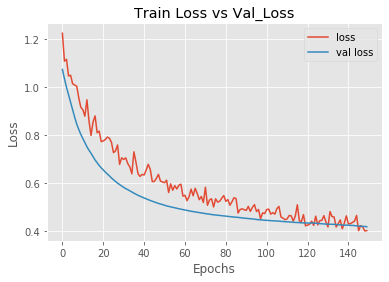

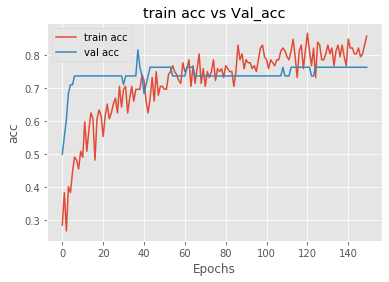

In [50]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.style.use('ggplot')
plt.plot(hist7.history['loss'], label = 'loss')
plt.plot(hist7.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(hist7.history['acc'], label = 'train acc')
plt.plot(hist7.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()


## Batch Normalization


In [51]:

# The main idea behind batch normalization is that we normalize the input layer by using several 
#techniques (sklearn.preprocessing.StandardScaler) in our case, which improves the model performance, 
#so if the input layer is benefitted by normalization, why not normalize the hidden layers, which will improve 
#and fasten learning even further.

# To add it in your TensorFlow model, just add tf.keras.layers.BatchNormalization() after your layers.

#Create model8, having same layers as the first model, but this time add a BatchNormalization layer after the first or second dense layer

model8 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    BatchNormalization(),
    Dense(512//2, activation='tanh'),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
 

model8.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist8 = model8.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))


Train on 112 samples, validate on 38 samples
Epoch 1/150
112/112 [==============================] - 0s 3ms/sample - loss: 1.0736 - acc: 0.4196 - mean_squared_error: 0.2160 - val_loss: 1.0603 - val_acc: 0.4211 - val_mean_squared_error: 0.2136
Epoch 2/150
112/112 [==============================] - 0s 89us/sample - loss: 0.9335 - acc: 0.5982 - mean_squared_error: 0.1848 - val_loss: 1.0358 - val_acc: 0.4474 - val_mean_squared_error: 0.2079
Epoch 3/150
112/112 [==============================] - 0s 89us/sample - loss: 0.8259 - acc: 0.7768 - mean_squared_error: 0.1601 - val_loss: 1.0074 - val_acc: 0.7105 - val_mean_squared_error: 0.2014
Epoch 4/150
112/112 [==============================] - 0s 89us/sample - loss: 0.7398 - acc: 0.8125 - mean_squared_error: 0.1402 - val_loss: 0.9798 - val_acc: 0.7368 - val_mean_squared_error: 0.1950
Epoch 5/150
112/112 [==============================] - 0s 89us/sample - loss: 0.6744 - acc: 0.8304 - mean_squared_error: 0.1248 - val_loss: 0.9562 - val_acc: 0.7368

Epoch 42/150
112/112 [==============================] - 0s 107us/sample - loss: 0.2428 - acc: 0.9196 - mean_squared_error: 0.0368 - val_loss: 0.6544 - val_acc: 0.8158 - val_mean_squared_error: 0.1191
Epoch 43/150
112/112 [==============================] - 0s 80us/sample - loss: 0.2395 - acc: 0.9196 - mean_squared_error: 0.0362 - val_loss: 0.6505 - val_acc: 0.8158 - val_mean_squared_error: 0.1183
Epoch 44/150
112/112 [==============================] - 0s 80us/sample - loss: 0.2362 - acc: 0.9286 - mean_squared_error: 0.0356 - val_loss: 0.6467 - val_acc: 0.8158 - val_mean_squared_error: 0.1176
Epoch 45/150
112/112 [==============================] - 0s 80us/sample - loss: 0.2331 - acc: 0.9286 - mean_squared_error: 0.0351 - val_loss: 0.6430 - val_acc: 0.8158 - val_mean_squared_error: 0.1168
Epoch 46/150
112/112 [==============================] - 0s 80us/sample - loss: 0.2301 - acc: 0.9286 - mean_squared_error: 0.0345 - val_loss: 0.6393 - val_acc: 0.8158 - val_mean_squared_error: 0.1161
Epoc

Epoch 84/150
112/112 [==============================] - 0s 89us/sample - loss: 0.1553 - acc: 0.9643 - mean_squared_error: 0.0216 - val_loss: 0.5446 - val_acc: 0.8158 - val_mean_squared_error: 0.0988
Epoch 85/150
112/112 [==============================] - 0s 80us/sample - loss: 0.1540 - acc: 0.9643 - mean_squared_error: 0.0214 - val_loss: 0.5429 - val_acc: 0.8158 - val_mean_squared_error: 0.0985
Epoch 86/150
112/112 [==============================] - 0s 80us/sample - loss: 0.1528 - acc: 0.9643 - mean_squared_error: 0.0212 - val_loss: 0.5412 - val_acc: 0.8158 - val_mean_squared_error: 0.0983
Epoch 87/150
112/112 [==============================] - 0s 71us/sample - loss: 0.1516 - acc: 0.9643 - mean_squared_error: 0.0210 - val_loss: 0.5395 - val_acc: 0.8421 - val_mean_squared_error: 0.0980
Epoch 88/150
112/112 [==============================] - 0s 80us/sample - loss: 0.1504 - acc: 0.9643 - mean_squared_error: 0.0208 - val_loss: 0.5380 - val_acc: 0.8421 - val_mean_squared_error: 0.0977
Epoch

112/112 [==============================] - 0s 80us/sample - loss: 0.1166 - acc: 0.9821 - mean_squared_error: 0.0153 - val_loss: 0.4946 - val_acc: 0.8684 - val_mean_squared_error: 0.0905
Epoch 126/150
112/112 [==============================] - 0s 80us/sample - loss: 0.1159 - acc: 0.9821 - mean_squared_error: 0.0152 - val_loss: 0.4938 - val_acc: 0.8684 - val_mean_squared_error: 0.0903
Epoch 127/150
112/112 [==============================] - 0s 80us/sample - loss: 0.1152 - acc: 0.9821 - mean_squared_error: 0.0151 - val_loss: 0.4929 - val_acc: 0.8684 - val_mean_squared_error: 0.0902
Epoch 128/150
112/112 [==============================] - 0s 80us/sample - loss: 0.1145 - acc: 0.9821 - mean_squared_error: 0.0150 - val_loss: 0.4922 - val_acc: 0.8684 - val_mean_squared_error: 0.0900
Epoch 129/150
112/112 [==============================] - 0s 80us/sample - loss: 0.1139 - acc: 0.9821 - mean_squared_error: 0.0149 - val_loss: 0.4914 - val_acc: 0.8684 - val_mean_squared_error: 0.0899
Epoch 130/150


In [52]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set
test_loss,test_acc,mse = model8.evaluate(X_test,y_test)
print("test loss: ",test_loss)
print("test acc: ",test_acc)
print("mse: ",mse)

38/38 [==============================] - 0s 131us/sample - loss: 0.4774 - acc: 0.8684 - mean_squared_error: 0.0870
test loss:  0.47740794169275386
test acc:  0.8684211
mse:  0.086976446


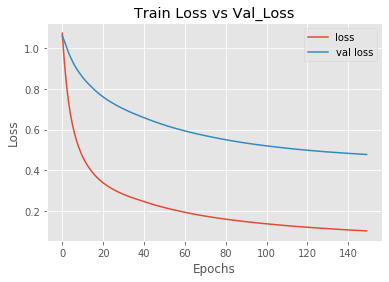

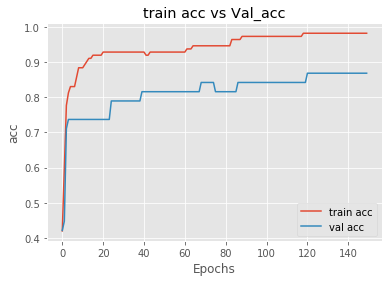

In [53]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before
plt.style.use('ggplot')
plt.plot(hist8.history['loss'], label = 'loss')
plt.plot(hist8.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(hist8.history['acc'], label = 'train acc')
plt.plot(hist8.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()


In [54]:

# Now create model9, having a BatchNormalization layer after each dense layer

model9 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    BatchNormalization(),
    Dense(512//2, activation='tanh'),
    BatchNormalization(),
    Dense(512//4, activation='tanh'),
    BatchNormalization(),
    Dense(512//8, activation='tanh'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='softmax')
])
 

model9.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])
hist9 = model9.fit(X_train, y_train, epochs=150,  validation_data=(X_test,y_test), verbose=2)


Train on 112 samples, validate on 38 samples
Epoch 1/150
112/112 - 1s - loss: 1.0026 - acc: 0.5446 - mean_squared_error: 0.1899 - val_loss: 0.8725 - val_acc: 0.7368 - val_mean_squared_error: 0.1709
Epoch 2/150
112/112 - 0s - loss: 0.3423 - acc: 0.8750 - mean_squared_error: 0.0639 - val_loss: 0.8459 - val_acc: 0.7105 - val_mean_squared_error: 0.1651
Epoch 3/150
112/112 - 0s - loss: 0.2811 - acc: 0.8661 - mean_squared_error: 0.0534 - val_loss: 0.8199 - val_acc: 0.7105 - val_mean_squared_error: 0.1585
Epoch 4/150
112/112 - 0s - loss: 0.2200 - acc: 0.9375 - mean_squared_error: 0.0377 - val_loss: 0.8328 - val_acc: 0.7632 - val_mean_squared_error: 0.1626
Epoch 5/150
112/112 - 0s - loss: 0.2964 - acc: 0.9018 - mean_squared_error: 0.0544 - val_loss: 0.8405 - val_acc: 0.7632 - val_mean_squared_error: 0.1660
Epoch 6/150
112/112 - 0s - loss: 0.1969 - acc: 0.9375 - mean_squared_error: 0.0317 - val_loss: 0.7941 - val_acc: 0.7895 - val_mean_squared_error: 0.1542
Epoch 7/150
112/112 - 0s - loss: 0.24

Epoch 54/150
112/112 - 0s - loss: 0.1354 - acc: 0.9554 - mean_squared_error: 0.0246 - val_loss: 0.6850 - val_acc: 0.5789 - val_mean_squared_error: 0.1493
Epoch 55/150
112/112 - 0s - loss: 0.1146 - acc: 0.9732 - mean_squared_error: 0.0167 - val_loss: 0.6498 - val_acc: 0.5789 - val_mean_squared_error: 0.1396
Epoch 56/150
112/112 - 0s - loss: 0.1465 - acc: 0.9286 - mean_squared_error: 0.0267 - val_loss: 0.6715 - val_acc: 0.7105 - val_mean_squared_error: 0.1402
Epoch 57/150
112/112 - 0s - loss: 0.0864 - acc: 0.9821 - mean_squared_error: 0.0128 - val_loss: 0.6201 - val_acc: 0.6842 - val_mean_squared_error: 0.1312
Epoch 58/150
112/112 - 0s - loss: 0.1115 - acc: 0.9643 - mean_squared_error: 0.0189 - val_loss: 0.5707 - val_acc: 0.8158 - val_mean_squared_error: 0.1121
Epoch 59/150
112/112 - 0s - loss: 0.0943 - acc: 0.9821 - mean_squared_error: 0.0139 - val_loss: 0.6650 - val_acc: 0.6842 - val_mean_squared_error: 0.1416
Epoch 60/150
112/112 - 0s - loss: 0.0443 - acc: 1.0000 - mean_squared_error:

Epoch 108/150
112/112 - 0s - loss: 0.0572 - acc: 0.9821 - mean_squared_error: 0.0090 - val_loss: 0.2789 - val_acc: 0.8947 - val_mean_squared_error: 0.0539
Epoch 109/150
112/112 - 0s - loss: 0.0815 - acc: 0.9821 - mean_squared_error: 0.0123 - val_loss: 0.2351 - val_acc: 0.8947 - val_mean_squared_error: 0.0467
Epoch 110/150
112/112 - 0s - loss: 0.0806 - acc: 0.9643 - mean_squared_error: 0.0148 - val_loss: 0.2555 - val_acc: 0.9211 - val_mean_squared_error: 0.0492
Epoch 111/150
112/112 - 0s - loss: 0.1369 - acc: 0.9375 - mean_squared_error: 0.0264 - val_loss: 0.2453 - val_acc: 0.9211 - val_mean_squared_error: 0.0498
Epoch 112/150
112/112 - 0s - loss: 0.0751 - acc: 0.9821 - mean_squared_error: 0.0115 - val_loss: 0.2661 - val_acc: 0.8947 - val_mean_squared_error: 0.0537
Epoch 113/150
112/112 - 0s - loss: 0.0614 - acc: 0.9821 - mean_squared_error: 0.0098 - val_loss: 0.2875 - val_acc: 0.8947 - val_mean_squared_error: 0.0543
Epoch 114/150
112/112 - 0s - loss: 0.0769 - acc: 0.9643 - mean_squared

In [55]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

test_loss,test_acc,mse = model9.evaluate(X_test,y_test)
print("test loss: ",test_loss)
print("test acc: ",test_acc)
print("mse: ",mse)
 

38/38 [==============================] - 0s 158us/sample - loss: 0.2590 - acc: 0.8947 - mean_squared_error: 0.0492
test loss:  0.25903347252230896
test acc:  0.8947368
mse:  0.049180787


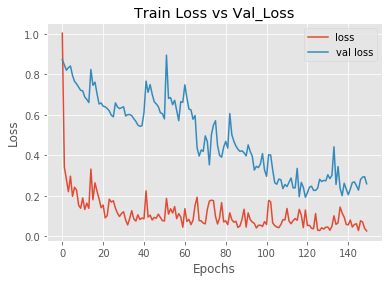

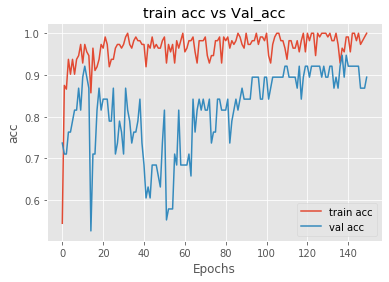

In [56]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before
plt.style.use('ggplot')
plt.plot(hist9.history['loss'], label = 'loss')
plt.plot(hist9.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(hist9.history['acc'], label = 'train acc')
plt.plot(hist9.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()


In [58]:
#After completing the above tasks, note down what you've understood and observed in each of 
#the 9 models and what type of regularization works best for this dataset

print("""
    Regularization is to avoid overfitting. It shrinks the coefficient to zero to avoid overfitting.
    
    The two types of regularization we've used are L1(lasso) and L2(ridge) normalization.
    
    In L1 regularization, only the higher coefficients are penalised whereas in L2 regularization, all coefficients are penalised.
    λ is the tuning parameter that decides how much we want to penalize the flexibility of our model. As λ approaches infinity,  
    the ridge regression coeﬃcient estimates will approach zero.So choosing the right value of λ is important.
    
    Dropout: Another to method to prevent overfitting. Dropout shuts down a given percentage of the nodes on a random basis.
    So, this does not pass on the some information to the next layer and prevent the model from
    giving unequal weightage to a single feature,thus makes the model more flexible.
    
    Batch Normalization: Batch normalization is a technique that standardizes the inputs to a layer for each mini-batch. 
    This stabilizes the learning process and reduces the number of training epochs required to train the model.
    
    For our dataset, model 9 which has batch normalization layer after each layer works the best 
    as it has the highest train as well as test accuracy which indicates low bias and low variance.

""")


    Regularization is to avoid overfitting. It shrinks the coefficient to zero to avoid overfitting.
    
    The two types of regularization we've used are L1(lasso) and L2(ridge) normalization.
    
    In L1 regularization, only the higher coefficients are penalised whereas in L2 regularization, all coefficients are penalised.
    λ is the tuning parameter that decides how much we want to penalize the flexibility of our model. As λ approaches infinity,  
    the ridge regression coeﬃcient estimates will approach zero.So choosing the right value of λ is important.
    
    Dropout: Another to method to prevent overfitting. Dropout shuts down a given percentage of the nodes on a random basis.
    So, this does not pass on the some information to the next layer and prevent the model from
    giving unequal weightage to a single feature,thus makes the model more flexible.
    
    Batch Normalization: Batch normalization is a technique that standardizes the inputs to a layer for each m